State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_13816\893401396.py:40: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


Total churn:  28


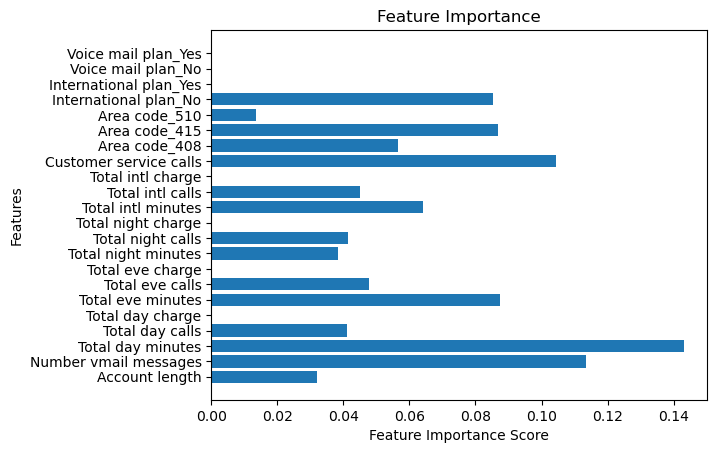

In [1]:
#XGBOOST MODEL WITH VISUALIZE


import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt


# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column, threshold=3):
    """
    This function replaces outlier values in a column of a dataframe with the median value.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the column to be cleaned.
    column (str): The name of the column to be cleaned.
    threshold (float): The threshold for determining outlier values.

    Returns:
    pandas.DataFrame: The cleaned dataframe.
    """
    median = df[column].median()
    std = df[column].std()
    outliers = (df[column] - median).abs() > threshold * std
    df.loc[outliers, column] = median
    return df

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\telecom churn.csv\churn-bigml-20.csv")

# FEATURE SELECTION
df = df[['State','Account length','Area code','International plan','Voice mail plan','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls','Churn']]

# IDENTIFYING MISSING VALUES
print(df.isnull().sum())

# # DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)

#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)

# DROP THE COLUMN
df.drop('State', axis=1, inplace=True)

# ONE -HOT ENCODING
df = pd.get_dummies(df, columns=['Area code', 'International plan', 'Voice mail plan'])

# HANDLE OUTLIERS
df = handle_outliers(df, 'Churn')

# REMOVE DUPLICATES ROWS
df.drop_duplicates(inplace=True)

# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# SPLIT DATA
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TRAIN MODEL
model = XGBClassifier()
model.fit(X_train, y_train)

# PREDICT CHURN
y_pred = model.predict(X_test)




total_churn = y_test.sum()

print("Total churn: ", total_churn)

# BUILD PLOT
plt.barh(X_train.columns, model.feature_importances_)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')

plt.show()

Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_13816\1133583695.py:32: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


Epoch 1/50
12/12 [==============================] - 1s 26ms/step - loss: 12.7058 - accuracy: 0.5995 - val_loss: 6.6834 - val_accuracy: 0.8191
Epoch 2/50
12/12 [==============================] - 0s 6ms/step - loss: 9.2367 - accuracy: 0.7849 - val_loss: 7.4161 - val_accuracy: 0.8191
Epoch 3/50
12/12 [==============================] - 0s 6ms/step - loss: 8.0017 - accuracy: 0.7796 - val_loss: 5.1688 - val_accuracy: 0.8191
Epoch 4/50
12/12 [==============================] - 0s 6ms/step - loss: 5.6657 - accuracy: 0.7634 - val_loss: 3.7969 - val_accuracy: 0.8085
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 5.5456 - accuracy: 0.7634 - val_loss: 4.2063 - val_accuracy: 0.8191
Epoch 6/50
12/12 [==============================] - 0s 6ms/step - loss: 6.3060 - accuracy: 0.7581 - val_loss: 5.5143 - val_accuracy: 0.8191
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 5.9721 - accuracy: 0.7554 - val_loss: 4.4033 - val_accuracy: 0.8191
Epoch 8/50
12/12 [

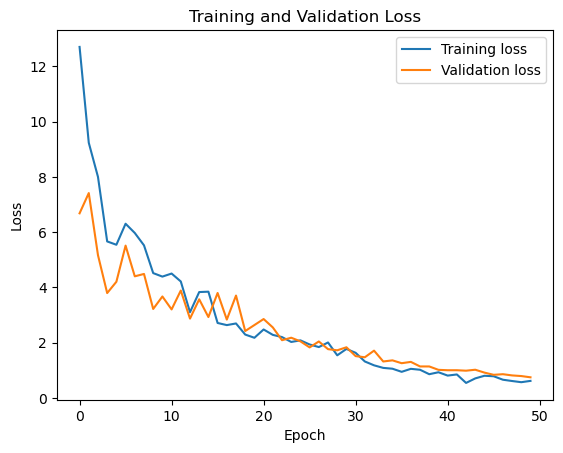

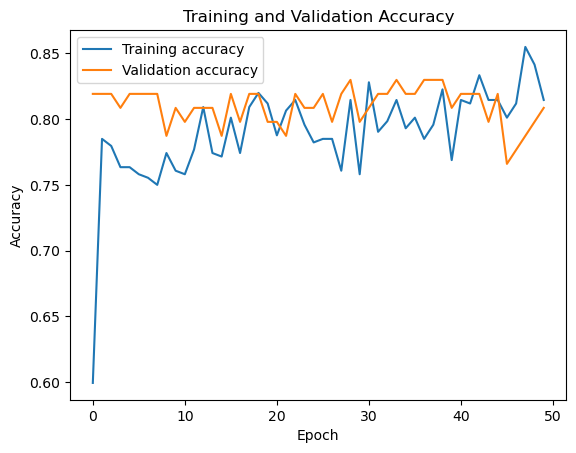

In [2]:
#use anns model for predict churn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout



# HANDLE OUTLIERS
median = df['Churn'].median()
std = df['Churn'].std()
outliers = (df['Churn'] - median).abs() > 3 * std
df.loc[outliers, 'Churn'] = median

# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\telecom churn.csv\churn-bigml-20.csv")

# FEATURE SELECTION
df = df[['Account length','Area code','International plan','Voice mail plan','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls','Churn']]

# IDENTIFYING MISSING VALUES
print(df.isnull().sum())

# REMOVE DUBLICATE ROWS
df.dropna(inplace=True)

#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)


#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)



# ONE -HOT ENCODEING
df = pd.get_dummies(df, columns=['Area code', 'International plan', 'Voice mail plan'])



# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)

# CONVERT BOOLEAN COLUMN TO INTEGER (0 or 1)
df['Churn'] = df['Churn'].astype(int)


# NORMALIZE AND SCALING ALL NUMERICAL COLUMN
scaler = MinMaxScaler()
num_cols = X_train.select_dtypes(include='number').columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])



# SPLIT DATA
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# BUILD ANNs MODEL
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# TRAIN MODEL
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# PREDICT CHURN FOR TEST SET
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
total_churn = y_test.sum()


accuracy = np.sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy}")
print(f"Total churn: {total_churn}")



plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()